<p style="font-family: Arial; font-size:3em;color:purple; font-style:bold"><br>
Pandas for Panel Data<br><br>Week 5
</p><br>

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
Case Study with a panel data set of real minimum wages from the OECD
</p><br>

**Please download the pdf file from D2L for the tutorial.**

In [25]:
import pandas as pd

# Display 6 columns for viewing purposes
pd.set_option('display.max_columns', 6)

# Reduce decimal points to 2
pd.options.display.float_format = '{:,.2f}'.format

realwage = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/realwage.csv')

In [26]:
realwage.head()  # Show first 5 rows

,Unnamed: 0,Time,Country,Series,Pay period,value
0,0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,132.44"
1,1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,100.92"
2,2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,747.41"
3,3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,580.14"
4,4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,755.83"


In [27]:
realwage.drop(columns=['Unnamed: 0'])

,Time,Country,Series,Pay period,value
0,2006-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,132.44"
1,2007-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,100.92"
2,2008-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,747.41"
3,2009-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,580.14"
4,2010-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,755.83"
5,2011-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"18,284.30"
6,2012-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,979.94"
7,2013-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,890.01"
8,2014-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,854.88"
9,2015-01-01,Ireland,In 2015 constant prices at 2015 USD PPPs,Annual,"17,907.64"


In [28]:
realwage.shape

(1408, 6)

In [29]:
type(realwage)

pandas.core.frame.DataFrame

### pandas.pivot_table
Create a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.

In [30]:
realwage = realwage.pivot_table(values='value',
                                index='Time',
                                columns=['Country', 'Series', 'Pay period'])
realwage.head()

Country                                   Australia         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                20,410.65  10.33   
2007-01-01                                21,087.57  10.67   
2008-01-01                                20,718.24  10.48   
2009-01-01                                20,984.77  10.62   
2010-01-01                                20,879.33  10.57   

Country                                                        ...    \
Series     In 2015 constant prices at 2015 USD exchange rates  ...     
Pay period                                             Annual  ...     
Time                                                           ...     
2006-01-01                                          23,826.64  ...     
2007-01-01                                          24,616.84  ...     
2008-01-01                                          24,185.70  ...     
2009-01-01                                          24,496.84  ...     
2010-01-01                                          24,373.76  ...     

Country                               United States  \
Series     In 2015 constant prices at 2015 USD PPPs   
Pay period                                   Hourly   
Time                                                  
2006-01-01                                     6.05   
2007-01-01                                     6.24   
2008-01-01                                     6.78   
2009-01-01                                     7.58   
2010-01-01                                     7.88   

Country                                                               
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88  

[5 rows x 128 columns]

In [31]:
type(realwage.columns)

pandas.core.indexes.multi.MultiIndex

### pandas.to_datetime

Convert argument to datetime

In [32]:
realwage.index = pd.to_datetime(realwage.index)
type(realwage.index)

pandas.core.indexes.datetimes.DatetimeIndex

```none
pandas.core.indexes.datetimes.DatetimeIndex
```


In [33]:
type(realwage.columns)

pandas.core.indexes.multi.MultiIndex

### MultiIndex

Internally, the MultiIndex consists of a few things: the levels, the integer labels, and the level names:

- Make a MultiIndex from the cartesian product of multiple iterables using from_product
- The product of set X and set Y is the set that contains all ordered pairs ( x, y ) for which x belongs to X and y belongs to Y.

- levels : sequence of arrays
    * The unique labels for each level

- labels : sequence of arrays
    * Integers for each level designating which label at each location

- names : optional sequence of objects
    * Names for each of the index levels. 

In [34]:
# The bad way

index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [35]:
# The Better Way: Pandas MultiIndex
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [36]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [37]:
index = pd.MultiIndex.from_product([range(3), ['one', 'two']], names=['first', 'second'])


In [38]:
index

MultiIndex(levels=[[0, 1, 2], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [39]:
index.levels


FrozenList([[0, 1, 2], ['one', 'two']])

The labels determine which unique element is identified with that location at each layer of the index.

In [40]:
index.labels


FrozenList([[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [41]:
index.names


FrozenList(['first', 'second'])

In [42]:
realwage.columns.levels

FrozenList([['Australia', 'Belgium', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Estonia', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Israel', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Poland', 'Portugal', 'Russian Federation', 'Slovak Republic', 'Slovenia', 'Spain', 'Turkey', 'United Kingdom', 'United States'], ['In 2015 constant prices at 2015 USD PPPs', 'In 2015 constant prices at 2015 USD exchange rates'], ['Annual', 'Hourly']])

In [43]:
realwage.columns.labels

FrozenList([[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23, 23, 23, 24, 24, 24, 24, ...], [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, ...], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, ...]])

In [44]:
realwage.columns.names

FrozenList(['Country', 'Series', 'Pay period'])

```none
FrozenList(['Country', 'Series', 'Pay period'])
```


In [45]:
realwage['United States'].head()

Series     In 2015 constant prices at 2015 USD PPPs         \
Pay period                                   Annual Hourly   
Time                                                         
2006-01-01                                12,594.40   6.05   
2007-01-01                                12,974.40   6.24   
2008-01-01                                14,097.56   6.78   
2009-01-01                                15,756.42   7.58   
2010-01-01                                16,391.31   7.88   

Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Time                                                                  
2006-01-01                                          12,594.40   6.05  
2007-01-01                                          12,974.40   6.24  
2008-01-01                                          14,097.56   6.78  
2009-01-01                                          15,756.42   7.58  
2010-01-01                                          16,391.31   7.88

## MultiIndex as extra dimension
### pandas.DataFrame.stack
Pivot a level of the (possibly hierarchical) column labels, returning a DataFrame (or Series in the case of an object with a single level of column labels) having a hierarchical index with a new inner-most level of row labels. The level involved will automatically get sorted.

The unstack() method will quickly convert a multiply indexed Series into a conventionally indexed DataFrame:

In [46]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


Naturally, the stack() method provides the opposite operation:

In [47]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [48]:
realwage.stack().head()

Country                                              Australia  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    20,410.65   
           Hourly                                        10.33   
2007-01-01 Annual                                    21,087.57   
           Hourly                                        10.67   
2008-01-01 Annual                                    20,718.24   

Country                                                                   \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              23,826.64   
           Hourly                                                  12.06   
2007-01-01 Annual                                              24,616.84   
           Hourly                                                  12.46   
2008-01-01 Annual                                              24,185.70   

Country                                                Belgium  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    21,042.28   
           Hourly                                        10.09   
2007-01-01 Annual                                    21,310.05   
           Hourly                                        10.22   
2008-01-01 Annual                                    21,416.96   

Country                                      ...                          \
Series                                       ...                           
Time       Pay period                        ...                           
2006-01-01 Annual                            ...                           
           Hourly                            ...                           
2007-01-01 Annual                            ...                           
           Hourly                            ...                           
2008-01-01 Annual                            ...                           

Country                                                   United Kingdom  \
Series                In 2015 constant prices at 2015 USD exchange rates   
Time       Pay period                                                      
2006-01-01 Annual                                              20,376.32   
           Hourly                                                   9.81   
2007-01-01 Annual                                              20,954.13   
           Hourly                                                  10.07   
2008-01-01 Annual                                              20,902.87   

Country                                          United States  \
Series                In 2015 constant prices at 2015 USD PPPs   
Time       Pay period                                            
2006-01-01 Annual                                    12,594.40   
           Hourly                                         6.05   
2007-01-01 Annual                                    12,974.40   
           Hourly                                         6.24   
2008-01-01 Annual                                    14,097.56   

Country                                                                   
Series                In 2015 constant prices at 2015 USD exchange rates  
Time       Pay period                                                     
2006-01-01 Annual                                              12,594.40  
           Hourly                                                   6.05  
2007-01-01 Annual                                              12,974.40  
           Hourly                                                   6.24  
2008-01-01 Annual                                            

In [49]:
realwage.stack(level='Country').head()

Series               In 2015 constant prices at 2015 USD PPPs         \
Pay period                                             Annual Hourly   
Time       Country                                                     
2006-01-01 Australia                                20,410.65  10.33   
           Belgium                                  21,042.28  10.09   
           Brazil                                    3,310.51   1.41   
           Canada                                   13,649.69   6.56   
           Chile                                     5,201.65   2.22   

Series               In 2015 constant prices at 2015 USD exchange rates         
Pay period                                                       Annual Hourly  
Time       Country                                                              
2006-01-01 Australia                                          23,826.64  12.06  
           Belgium                                            20,228.74   9.70  
           Brazil                                              2,032.87   0.87  
           Canada                                             14,335.12   6.89  
           Chile                                               3,333.76   1.42

In [50]:
realwage['2015'].stack(level=(1, 2)).transpose().head()

Time                                     2015-01-01         \
Series     In 2015 constant prices at 2015 USD PPPs          
Pay period                                   Annual Hourly   
Country                                                      
Australia                                 21,715.53  10.99   
Belgium                                   21,588.12  10.35   
Brazil                                     4,628.63   2.00   
Canada                                    16,536.83   7.95   
Chile                                      6,633.56   2.80   

Time                                                                  
Series     In 2015 constant prices at 2015 USD exchange rates         
Pay period                                             Annual Hourly  
Country                                                               
Australia                                           25,349.90  12.83  
Belgium                                             20,753.48   9.95  
Brazil                                               2,842.28   1.21  
Canada                                              17,367.24   8.35  
Chile                                                4,251.49   1.81

### pandas.DataFrame.xs
Returns a cross-section (row(s) or column(s)) from the Series/DataFrame. Defaults to cross-section on the rows (axis=0).

This method takes a key argument to select data at a particular level of a MultiIndex.

- key : label or tuple of label
    * Label contained in the index, or partially in a MultiIndex.
- level : object, defaults to first n levels (n=1 or len(key))
    * In case of a key partially contained in a MultiIndex, indicate which levels are used. Levels can be referred by label or position.

In [51]:
realwage_f = realwage.xs(('Hourly', 'In 2015 constant prices at 2015 USD exchange rates'),
                         level=('Pay period', 'Series'), axis=1)
realwage_f.head()

Country,Australia,Belgium,Brazil,...,Turkey,United Kingdom,United States
Time,,,,,,,
2006-01-01,12.06,9.70,0.87,...,2.27,9.81,6.05
2007-01-01,12.46,9.82,0.92,...,2.26,10.07,6.24
2008-01-01,12.24,9.87,0.96,...,2.22,10.04,6.78
2009-01-01,12.40,10.21,1.03,...,2.28,10.15,7.58
2010-01-01,12.34,10.05,1.08,...,2.30,9.96,7.88


In [52]:
worlddata = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/countries.csv', sep=';')
worlddata.head()

,Country (en),Country (de),Country (local),...,Deathrate,Life expectancy,Url
0,Afghanistan,Afghanistan,Afganistan/Afqanestan,...,13.70,51.30,https://www.laenderdaten.info/Asien/Afghanista...
1,Egypt,Ägypten,Misr,...,4.70,72.70,https://www.laenderdaten.info/Afrika/Aegypten/...
2,Åland Islands,Ålandinseln,Åland,...,0.00,0.00,https://www.laenderdaten.info/Europa/Aland/ind...
3,Albania,Albanien,Shqipëria,...,6.70,78.30,https://www.laenderdaten.info/Europa/Albanien/...
4,Algeria,Algerien,Al-Jaza’ir/Algérie,...,4.30,76.80,https://www.laenderdaten.info/Afrika/Algerien/...


In [53]:
worlddata = worlddata[['Country (en)', 'Continent']]
worlddata = worlddata.rename(columns={'Country (en)': 'Country'})
worlddata.head()

,Country,Continent
0,Afghanistan,Asia
1,Egypt,Africa
2,Åland Islands,Europe
3,Albania,Europe
4,Algeria,Africa


In [54]:
realwage_f.transpose().head()

Time,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2014-01-01 00:00:00,2015-01-01 00:00:00,2016-01-01 00:00:00
Country,,,,,,,
Australia,12.06,12.46,12.24,...,12.67,12.83,12.98
Belgium,9.70,9.82,9.87,...,10.01,9.95,9.76
Brazil,0.87,0.92,0.96,...,1.21,1.21,1.24
Canada,6.89,6.96,7.24,...,8.22,8.35,8.48
Chile,1.42,1.45,1.44,...,1.76,1.81,1.91


### Merge, join, and concatenate

https://pandas.pydata.org/pandas-docs/stable/merging.html
#### Left Outer Join
<img src='https://pandas.pydata.org/pandas-docs/stable/_images/merging_merge_on_key_left.png'>


The how argument to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or right tables, the values in the joined table will be NA. Here is a summary of the how options and their SQL equivalent names:

    Merge method	SQL Join Name       Description
    left	         LEFT OUTER JOIN	 Use keys from left frame only
    right	        RIGHT OUTER JOIN	Use keys from right frame only
    outer	        FULL OUTER JOIN	 Use union of keys from both frames
    inner	        INNER JOIN	      Use intersection of keys from both frames

In [55]:
merged = pd.merge(realwage_f.transpose(), worlddata,
                  how='left', left_index=True, right_on='Country')
merged.head()

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
17,12.06,12.46,12.24,...,12.98,Australia,Australia
23,9.70,9.82,9.87,...,9.76,Belgium,Europe
32,0.87,0.92,0.96,...,1.24,Brazil,South America
100,6.89,6.96,7.24,...,8.48,Canada,North America
38,1.42,1.45,1.44,...,1.91,Chile,South America


In [56]:
merged['Continent'].isnull()

17     False
23     False
32     False
100    False
38     False
108    False
41     False
225    False
53     False
58     False
45     False
68     False
233    False
86     False
88     False
91     False
247     True
117    False
122    False
123    False
138    False
153    False
151    False
174    False
175    False
247     True
247     True
198    False
200    False
227    False
241    False
240    False
Name: Continent, dtype: bool

In [57]:
merged[merged['Continent'].isnull()]

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
247,3.42,3.74,3.87,...,5.28,Korea,NaN
247,0.23,0.45,0.39,...,0.55,Russian Federation,NaN
247,1.50,1.64,1.71,...,2.08,Slovak Republic,NaN


In [58]:
missing_continents = {'Korea': 'Asia',
                      'Russian Federation': 'Europe',
                      'Slovak Republic': 'Europe'}

merged['Country'].map(missing_continents)

17        NaN
23        NaN
32        NaN
100       NaN
38        NaN
108       NaN
41        NaN
225       NaN
53        NaN
58        NaN
45        NaN
68        NaN
233       NaN
86        NaN
88        NaN
91        NaN
247      Asia
117       NaN
122       NaN
123       NaN
138       NaN
153       NaN
151       NaN
174       NaN
175       NaN
247    Europe
247    Europe
198       NaN
200       NaN
227       NaN
241       NaN
240       NaN
Name: Country, dtype: object

In [59]:
merged['Continent'] = merged['Continent'].fillna(merged['Country'].map(missing_continents))

# Check for whether continents were correctly mapped

merged[merged['Country'] == 'Korea']

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
247,3.42,3.74,3.87,...,5.28,Korea,Asia


In [60]:
merged[merged['Country'] == 'Australia']

,2006-01-01 00:00:00,2007-01-01 00:00:00,2008-01-01 00:00:00,...,2016-01-01 00:00:00,Country,Continent
17,12.06,12.46,12.24,...,12.98,Australia,Australia


In [61]:
replace = ['Central America', 'North America', 'South America']

for country in replace:
    merged['Continent'].replace(to_replace=country,
                                value='America',
                                inplace=True)

In [62]:
merged = merged.set_index(['Continent', 'Country']).sort_index()
merged.head()

2006-01-01  2007-01-01  2008-01-01     ...      \
Continent Country                                            ...       
America   Brazil            0.87        0.92        0.96     ...       
          Canada            6.89        6.96        7.24     ...       
          Chile             1.42        1.45        1.44     ...       
          Colombia          1.01        1.02        1.01     ...       
          Costa Rica         nan         nan         nan     ...       

                      2014-01-01  2015-01-01  2016-01-01  
Continent Country                                         
America   Brazil            1.21        1.21        1.24  
          Canada            8.22        8.35        8.48  
          Chile             1.76        1.81        1.91  
          Colombia          1.13        1.13        1.12  
          Costa Rica        2.41        2.56        2.63  

[5 rows x 11 columns]

In [63]:
merged.columns

Index([2006-01-01 00:00:00, 2007-01-01 00:00:00, 2008-01-01 00:00:00,
       2009-01-01 00:00:00, 2010-01-01 00:00:00, 2011-01-01 00:00:00,
       2012-01-01 00:00:00, 2013-01-01 00:00:00, 2014-01-01 00:00:00,
       2015-01-01 00:00:00, 2016-01-01 00:00:00],
      dtype='object')

In [64]:
merged.columns = pd.to_datetime(merged.columns)
merged.columns = merged.columns.rename('Time')
merged.columns

DatetimeIndex(['2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
               '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01'],
              dtype='datetime64[ns]', name='Time', freq=None)

In [65]:
merged = merged.transpose()
merged.head()

Continent  America                   ...         Europe                     
Country     Brazil Canada Chile      ...       Slovenia Spain United Kingdom
Time                                 ...                                    
2006-01-01    0.87   6.89  1.42      ...           3.92  3.99           9.81
2007-01-01    0.92   6.96  1.45      ...           3.88  4.10          10.07
2008-01-01    0.96   7.24  1.44      ...           3.96  4.14          10.04
2009-01-01    1.03   7.67  1.52      ...           4.08  4.32          10.15
2010-01-01    1.08   7.94  1.56      ...           4.81  4.30           9.96

[5 rows x 32 columns]

In [66]:
merged.mean().head(10)

Continent  Country      
America    Brazil          1.09
           Canada          7.82
           Chile           1.62
           Colombia        1.07
           Costa Rica      2.53
           Mexico          0.53
           United States   7.15
Asia       Israel          5.95
           Japan           6.18
           Korea           4.22
dtype: float64

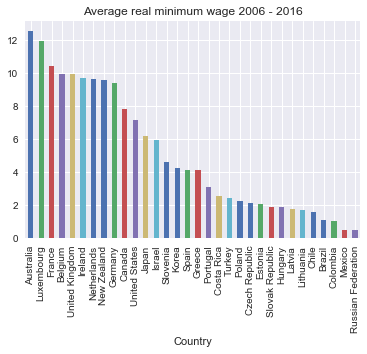

In [67]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')
%matplotlib inline

merged.mean().sort_values(ascending=False).plot(kind='bar', title="Average real minimum wage 2006 - 2016")

#Set country labels

country_labels = merged.mean().sort_values(ascending=False).index.get_level_values('Country').tolist()

plt.xticks(range(0, len(country_labels)), country_labels)
plt.xlabel('Country')

plt.show()

In [68]:
merged.mean(axis=1).head()

Time
2006-01-01   4.69
2007-01-01   4.84
2008-01-01   4.90
2009-01-01   5.08
2010-01-01   5.11
dtype: float64

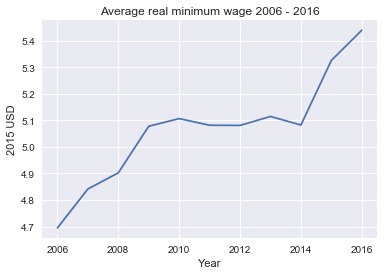

In [69]:
merged.mean(axis=1).plot()
plt.title('Average real minimum wage 2006 - 2016')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

In [70]:
merged.mean(level='Continent', axis=1).head()

Continent,America,Asia,Australia,Europe
Time,,,,
2006-01-01,2.80,4.29,10.25,4.80
2007-01-01,2.85,4.44,10.73,4.94
2008-01-01,2.99,4.45,10.76,4.99
2009-01-01,3.23,4.53,10.97,5.16
2010-01-01,3.34,4.53,10.95,5.17


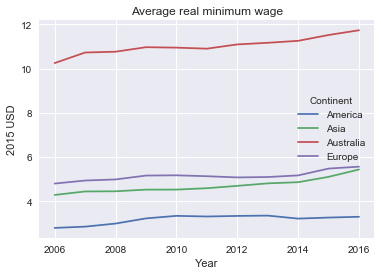

In [71]:
merged.mean(level='Continent', axis=1).plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

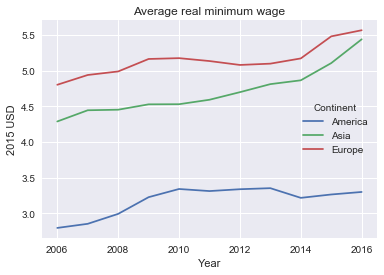

In [72]:
merged = merged.drop('Australia', level='Continent', axis=1)
merged.mean(level='Continent', axis=1).plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

In [73]:
merged.stack().describe()

Continent,America,Asia,Europe
count,69.00,44.00,200.00
mean,3.19,4.70,5.15
std,3.02,1.56,3.82
min,0.52,2.22,0.23
25%,1.03,3.37,2.02
50%,1.44,5.48,3.54
75%,6.96,5.95,9.70
max,8.48,6.65,12.39


In [74]:
merged.describe()

Continent America                   ...         Europe                     
Country    Brazil Canada Chile      ...       Slovenia Spain United Kingdom
count       11.00  11.00 11.00      ...          11.00 11.00          11.00
mean         1.09   7.82  1.62      ...           4.60  4.16           9.92
std          0.13   0.55  0.16      ...           0.52  0.10           0.20
min          0.87   6.89  1.42      ...           3.88  3.99           9.65
25%          0.99   7.46  1.48      ...           4.02  4.10           9.74
50%          1.09   7.97  1.59      ...           4.94  4.14           9.96
75%          1.21   8.20  1.74      ...           5.00  4.21          10.06
max          1.24   8.48  1.91      ...           5.05  4.32          10.26

[8 rows x 30 columns]

In [77]:
grouped = merged.groupby(level='Continent', axis=1)
grouped

### pandas.DataFrame.GroupBy

Group series using mapper (dict or key function, apply given function to group, return result as series) or by a series of columns.

GroupBy objects are returned by groupby calls: pandas.DataFrame.groupby()

by : mapping, function, str, or iterable

    Used to determine the groups for the groupby. If by is a function, it’s called on each value of the object’s index. If a dict or Series is passed, the Series or dict VALUES will be used to determine the groups
    
level : int, level name, or sequence of such, default None

    If the axis is a MultiIndex (hierarchical), group by a particular level or levels

In [78]:
grouped.sum()

Continent,America,Asia,Europe
Time,,,
2006-01-01,16.78,17.15,86.43
2007-01-01,17.12,17.78,88.89
2008-01-01,17.96,17.81,89.78
2009-01-01,19.36,18.11,92.93
2010-01-01,20.05,18.12,93.14
2011-01-01,19.87,18.37,92.40
2012-01-01,20.03,18.79,91.42
2013-01-01,20.12,19.24,91.75
2014-01-01,22.52,19.45,93.07


In [80]:
grouped.get_group('America')

Continent  America                   ...                                     
Country     Brazil Canada Chile      ...      Costa Rica Mexico United States
Time                                 ...                                     
2006-01-01    0.87   6.89  1.42      ...             nan   0.53          6.05
2007-01-01    0.92   6.96  1.45      ...             nan   0.53          6.24
2008-01-01    0.96   7.24  1.44      ...             nan   0.52          6.78
2009-01-01    1.03   7.67  1.52      ...             nan   0.52          7.58
2010-01-01    1.08   7.94  1.56      ...             nan   0.52          7.88
2011-01-01    1.09   7.97  1.59      ...             nan   0.53          7.64
2012-01-01    1.18   8.12  1.63      ...             nan   0.53          7.48
2013-01-01    1.21   8.17  1.72      ...             nan   0.53          7.38
2014-01-01    1.21   8.22  1.76      ...            2.41   0.53          7.26
2015-01-01    1.21   8.35  1.81      ...            2.56   0.54          7.25
2016-01-01    1.24   8.48  1.91      ...            2.63   0.56          7.16

[11 rows x 7 columns]

In [81]:
grouped.size()

Continent
America     7
Asia        4
Europe     19
dtype: int64

In [82]:
grouped.count()

Continent,America,Asia,Europe
Time,,,
2006-01-01,6,4,18
2007-01-01,6,4,18
2008-01-01,6,4,18
2009-01-01,6,4,18
2010-01-01,6,4,18
2011-01-01,6,4,18
2012-01-01,6,4,18
2013-01-01,6,4,18
2014-01-01,7,4,18


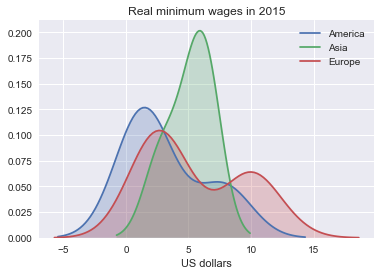

In [122]:
#!pip install seaborn

import seaborn as sns

continents = grouped.groups.keys()

for continent in continents:
    sns.kdeplot(grouped.get_group(continent)['2015'].unstack(), label=continent, shade=True)

plt.title('Real minimum wages in 2015')
plt.xlabel('US dollars')
plt.show()

In [123]:
employ = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas_panel/employ.csv')
employ = employ.pivot_table(values='Value',
                            index=['DATE'],
                            columns=['UNIT','AGE', 'SEX', 'INDIC_EM', 'GEO'])
employ.index = pd.to_datetime(employ.index) # ensure that dates are datetime format
employ.head()

UNIT       Percentage of total population                       ...        \
AGE                   From 15 to 24 years                       ...         
SEX                               Females                       ...         
INDIC_EM                Active population                       ...         
GEO                               Austria Belgium Bulgaria      ...         
DATE                                                            ...         
2007-01-01                          56.00   31.60    26.00      ...         
2008-01-01                          56.20   30.80    26.10      ...         
2009-01-01                          56.20   29.90    24.80      ...         
2010-01-01                          54.00   29.80    26.60      ...         
2011-01-01                          54.80   29.80    24.80      ...         

UNIT                                           Thousand persons           \
AGE                                         From 55 to 64 years            
SEX                                                       Total            
INDIC_EM   Total employment (resident population concept - LFS)            
GEO                                                 Switzerland   Turkey   
DATE                                                                       
2007-01-01                                                nan   1,282.00   
2008-01-01                                                nan   1,354.00   
2009-01-01                                                nan   1,449.00   
2010-01-01                                             640.00   1,583.00   
2011-01-01                                             661.00   1,760.00   

UNIT                       
AGE                        
SEX                        
INDIC_EM                   
GEO        United Kingdom  
DATE                       
2007-01-01       4,131.00  
2008-01-01       4,204.00  
2009-01-01       4,193.00  
2010-01-01       4,186.00  
2011-01-01       4,164.00  

[5 rows x 1440 columns]

In [124]:
employ.columns.names

FrozenList(['UNIT', 'AGE', 'SEX', 'INDIC_EM', 'GEO'])

Retrieving variables within levels with a for loop

In [ ]:
for name in employ.columns.names:
    print(name, employ.columns.get_level_values(name).unique())

#### pandas.DataFrame.swaplevel

DataFrame.swaplevel(i=-2, j=-1, axis=0)

    Swap levels i and j in a MultiIndex on a particular axis

In [132]:
employ.columns = employ.columns.swaplevel(0,-1)
employ = employ.sort_index(axis=1)
employ.columns.names

FrozenList(['GEO', 'AGE', 'SEX', 'INDIC_EM', 'UNIT'])

In [127]:
geo_list = employ.columns.get_level_values('GEO').unique().tolist()
countries = [x for x in geo_list if not x.startswith('Euro')] 
#The method startswith() checks if string starts with ''Euro''

employ = employ[countries]
employ.columns.get_level_values('GEO').unique()

Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland',
       'Former Yugoslav Republic of Macedonia, the', 'France',
       'France (metropolitan)',
       'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom'],
      dtype='object', name='GEO')

In [128]:
employ_f = employ.xs(('Percentage of total population', 'Active population'),
                     level=('UNIT', 'INDIC_EM'),
                     axis=1)
employ_f.head()

GEO                    Austria              ...       United Kingdom        \
AGE        From 15 to 24 years              ...  From 55 to 64 years         
SEX                    Females Males Total  ...              Females Males   
DATE                                        ...                              
2007-01-01               56.00 62.90 59.40  ...                49.90 68.90   
2008-01-01               56.20 62.90 59.50  ...                50.20 69.80   
2009-01-01               56.20 62.90 59.50  ...                50.60 70.30   
2010-01-01               54.00 62.60 58.30  ...                51.10 69.20   
2011-01-01               54.80 63.60 59.20  ...                51.30 68.40   

GEO               
AGE               
SEX        Total  
DATE              
2007-01-01 59.30  
2008-01-01 59.80  
2009-01-01 60.30  
2010-01-01 60.00  
2011-01-01 59.70  

[5 rows x 306 columns]

In [129]:
employ_f = employ_f.drop('Total', level='SEX', axis=1)

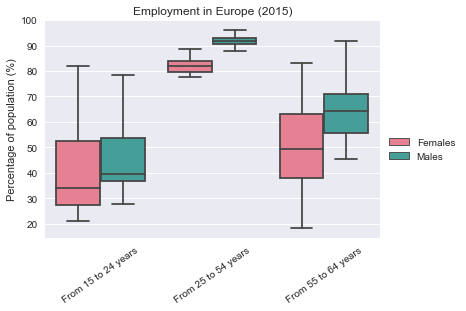

In [130]:
box = employ_f['2015'].unstack().reset_index()
sns.boxplot(x="AGE", y=0, hue="SEX", data=box, palette=("husl"), showfliers=False)
plt.xlabel('')
plt.xticks(rotation=35)
plt.ylabel('Percentage of population (%)')
plt.title('Employment in Europe (2015)')
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()